# Loading Data

In [166]:
import pandas as pd
from plotnine import *
from plotnine.data import *
import numpy as np

df = pd.read_csv("data/columnHistoryStatisticsWikipediaSample.csv")
df["deletedTimeInDays"] = (df["durationInDays"] - df["lifetimeInDays"])

# Trying out Filters

In [169]:
minLifetimeDays = 30
minNumVersionsWithChanges=1
minMedianSize=2.0

def lifetimeFilter(df):
    return df[df["lifetimeInDays"]>=minLifetimeDays]
    
def changeCountFilter(df):
    return df[df["nVersionsWithChanges"]>=minNumVersionsWithChanges]

def medianSizeFilter(df):
    return df[df["sizeStatistics.median"]>=minMedianSize]    

def filterAll(df):
    return lifetimeFilter(changeCountFilter(medianSizeFilter(df)))

#Lifetime > 30 Days:
lenBefore = len(df.index)
lenAfter = len(lifetimeFilter(df).index)
print("lifetimeInDays > ", minLifetimeDays," filter retains (",lenAfter,"/",lenBefore,") which is",100*lenAfter/lenBefore,"% of the data")
#Change count >= 5
lenBefore = len(df.index)
lenAfter = len(changeCountFilter(df).index)
print("nVersionsWithChanges > ",minNumVersionsWithChanges,"retains (",lenAfter,"/",lenBefore,") which is",100*lenAfter/lenBefore,"% of the data")
# filter by median size (?)
lenBefore = len(df.index)
lenAfter = len(medianSizeFilter(df).index)
print("sizeStatistics.median > ",minMedianSize,"retains (",lenAfter,"/",lenBefore,") which is",100*lenAfter/lenBefore,"% of the data")
# all filters:
lenBefore = len(df.index)
lenAfter = len(filterAll(df).index)
print("All Filters together retain (",lenAfter,"/",lenBefore,") which is",100*lenAfter/lenBefore,"% of the data")

lifetimeInDays >  30  filter retains ( 21805 / 21951 ) which is 99.33488223771127 % of the data
nVersionsWithChanges >  1 retains ( 8344 / 21951 ) which is 38.0119356749123 % of the data
sizeStatistics.median >  2.0 retains ( 7786 / 21951 ) which is 35.4699102546581 % of the data
All Filters together retain ( 7782 / 21951 ) which is 35.45168785021183 % of the data


In [146]:
# Filter apply:
df = filterAll(df)
# Fix data types:
#names = ([
#    "sizeStatistics.max",               
#    "sizeStatistics.min",               
#    "sizeStatistics.mean",              
#    "sizeStatistics.median",            
#    "changeAmountStatistics.max",       
#    "changeAmountStatistics.min",       
#    "changeAmountStatistics.mean",      
#    "changeAmountStatistics.median",    
#])
#for name in names:
#    df[name] = df[name].astype(float, errors = 'raise')

In [147]:
df.dtypes

ch.id                             object
ch.tableId                        object
ch.pageID                          int64
ch.pageTitle                      object
nVersions                          int64
nVersionsWithChanges               int64
durationInDays                     int64
lifetimeInDays                     int64
sizeStatistics.max               float64
sizeStatistics.min               float64
sizeStatistics.mean              float64
sizeStatistics.median            float64
changeAmountStatistics.max       float64
changeAmountStatistics.min       float64
changeAmountStatistics.mean      float64
changeAmountStatistics.median    float64
deletedTimeInDays                  int64
dtype: object

# Playground

In [148]:
print(df.nVersions.describe())
print(df.nVersionsWithChanges.describe())
print(df["sizeStatistics.median"].describe())
#print(df)

count    5393.000000
mean        6.979047
std         9.854700
min         2.000000
25%         3.000000
50%         4.000000
75%         7.000000
max       257.000000
Name: nVersions, dtype: float64
count    5393.000000
mean        5.676803
std         9.723607
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       255.000000
Name: nVersionsWithChanges, dtype: float64
count    5393.000000
mean       16.218431
std        19.220476
min         5.000000
25%         7.000000
50%        10.000000
75%        17.000000
max       312.000000
Name: sizeStatistics.median, dtype: float64


# Tables are rarely deleted for longer periods of Time: 

In [149]:
print(df["deletedTimeInDays"].describe())
print(df["lifetimeInDays"].describe())

count    5393.000000
mean       26.496199
std       192.835064
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      4187.000000
Name: deletedTimeInDays, dtype: float64
count    5393.000000
mean     2467.952160
std      1321.980191
min        37.000000
25%      1254.000000
50%      2542.000000
75%      3723.000000
max      4764.000000
Name: lifetimeInDays, dtype: float64


# Number of Versions

/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 79 rows containing missing values.


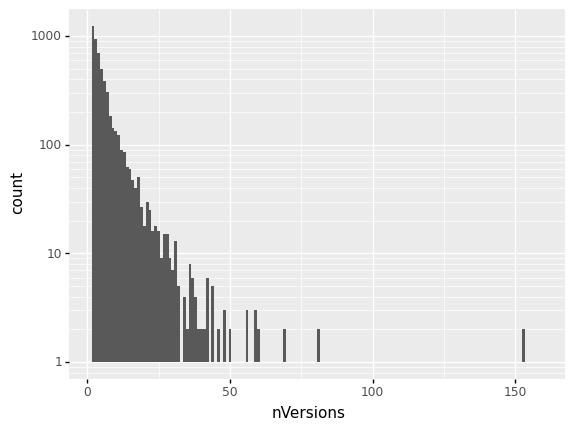

/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 81 rows containing missing values.


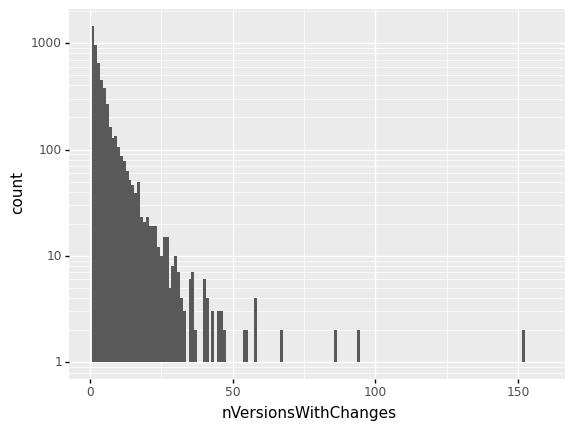

/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 35 rows containing missing values.


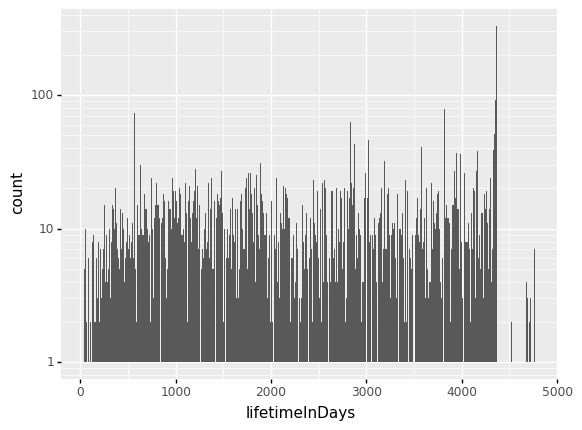

In [150]:
#nVersions with deletes/reinserts:

def printSimpleHistogram(df,xName,binwidthparam,yLogScale):
    p = (ggplot(df,aes(x=xName)) 
        + geom_histogram(binwidth=binwidthparam) 
        )# TODO: make this run!
    if(yLogScale):
        p = p + scale_y_log10()
    print(p)
    
dfForVersionGraphs = df[df["nVersions"]<200]
printSimpleHistogram(dfForVersionGraphs,"nVersions",1,True)
#nVersionsWithChange:
dfForVersionGraphs = df[df["nVersionsWithChanges"]<200]
printSimpleHistogram(dfForVersionGraphs,"nVersionsWithChanges",1,True)
printSimpleHistogram(df,"lifetimeInDays",10,True)


# Median Change Amount:

* For a single change to a column from x to y: 
* ChangeAmount(x,y): 1.0 - JaccardSim(x,y)
* Per column lineage we record mean, median min and max

(5, 10]       2198
(10, 25]      1778
(1, 5]         654
(25, 50]       511
(50, 100]      193
(100, 500]      59
(-1, 0]          0
(0, 1]           0
Name: sizeStatistics.medianBinned, dtype: int64
(0.0, 0.2]     2215
(0.2, 0.4]      986
(0.4, 0.6]      335
(0.8, 1.0]      260
(0.6, 0.8]      154
(-1.0, 0.0]       0
Name: changeAmountStatistics.medianBinned, dtype: int64
changeAmountStatistics.medianBinned  (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  \
sizeStatistics.medianBinned                                               
(1, 5]                                      111         185          49   
(5, 10]                                     559         584         180   
(10, 25]                                   1009         186          76   
(25, 50]                                    350          28          24   
(50, 100]                                   146           3           4   
(100, 500]                                   40           0           2   

changeAmountStatistics.

/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 1443 rows containing non-finite values.


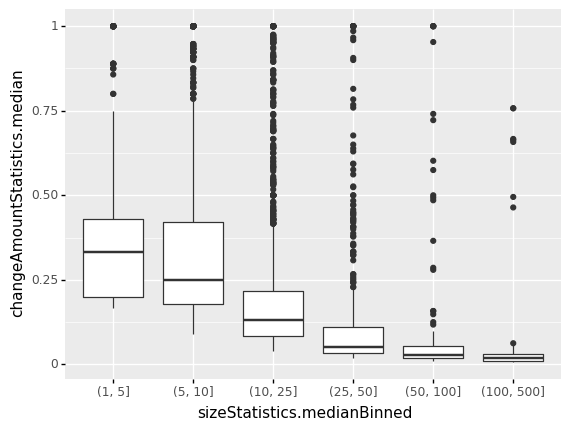

/home/leon/data/temporalINDDiscovery/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1490 rows containing missing values.


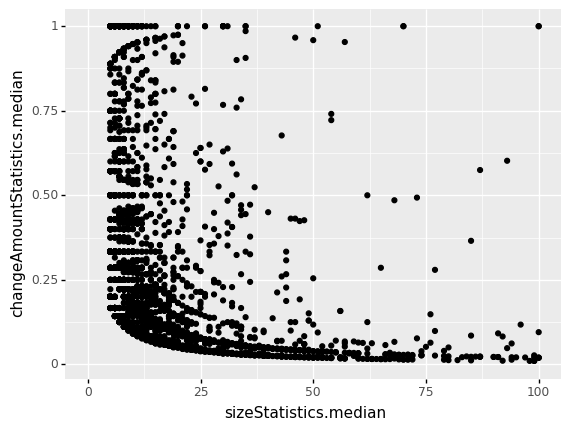

In [151]:
#bin by median size:
sizeBins = [-1,0, 1, 5, 10, 25, 50, 100, 500]
df['sizeStatistics.medianBinned'] = pd.cut(df['sizeStatistics.median'], sizeBins)
changeAmountBins = [-1.0,0.0,0.2,0.4,0.6,0.8,1.0]
df['changeAmountStatistics.medianBinned'] = pd.cut(df['changeAmountStatistics.median'], changeAmountBins)


#print(df['medianSizeBinned'].unique())
print(df['sizeStatistics.medianBinned'].value_counts())
print(df['changeAmountStatistics.medianBinned'].value_counts())

print(pd.crosstab(df['sizeStatistics.medianBinned'],df['changeAmountStatistics.medianBinned']))

#boxplot:

p = (ggplot(df,aes(ymin=0,ymax=1,y='changeAmountStatistics.median',x='sizeStatistics.medianBinned'))
    + geom_boxplot()
    #+ scale_y_log10()
#    + geom_point(size=0.5)
#   + theme(text=element_text(size=14))#,axis_text_x=element_text(rotation=45, hjust=1))
#  + labs(x="")
  )
print(p)

p = (ggplot(df,aes(y='changeAmountStatistics.median',x='sizeStatistics.median'))
    + geom_point()
    + xlim(0, 100)
    #+ scale_y_log10()
#    + geom_point(size=0.5)
#   + theme(text=element_text(size=14))#,axis_text_x=element_text(rotation=45, hjust=1))
#  + labs(x="")
  )
print(p)